# QUE FONT LES INSCRITS ?

#### Qu'est-ce qu'un inscrit ? 
> Un inscrit à la médiathèque est une personne dont la carte est encore valide à la dernière date d'extraction de la base de données.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from kiblib.utils.db import DbConn
from kiblib.utils import lucas_sns_params

In [2]:
db_conn = DbConn().create_engine()

In [3]:
maj = dt.today().strftime('%d-%m-%Y à %Hh%M' )
print(f"Dernière mise à jour le {maj}")

Dernière mise à jour le 04-02-2025 à 13h45


In [4]:
query = """SELECT MAX(date_extraction) AS date_max
FROM statdb.stat_adherents sa"""

df_date_max = pd.read_sql(query,db_conn)

In [5]:
# On met dans une variable la valeurs date qui nous intéresse :
date_max = df_date_max.iloc[0]["date_max"]
date_max = date_max.isoformat()

In [6]:
query = f"SELECT * FROM statdb.stat_adherents sa WHERE date_extraction = '{date_max}'"

In [7]:
inscrits = pd.read_sql(query,db_conn,parse_dates="date_max")

In [8]:
inscrits_usages = pd.DataFrame(inscrits,columns=[
    "nb_venues_prets_bus",
    "nb_venues_prets_mediatheque",
    "nb_venues_postes_informatiques",
    "nb_venues_wifi",
    "nb_venues_salle_etude"
])

In [9]:
inscrits_usages["nb_venues_prets"] = inscrits_usages["nb_venues_prets_bus"] + inscrits_usages["nb_venues_prets_mediatheque"]

In [10]:
# USAGERS ET USAGERES DONT ON A AUCUNE TRACE INFORMATIQUE
inscrits_usages["aucune trace"] = np.where(
    (inscrits_usages["nb_venues_prets"]==0) &
    (inscrits_usages["nb_venues_postes_informatiques"]==0) &
    (inscrits_usages["nb_venues_wifi"]==0) & 
    (inscrits_usages["nb_venues_salle_etude"]==0),1,0
)

In [11]:
# USAGERS ET USAGERES QUI NE FONT QUE EMPRUNTER
inscrits_usages["prets"] = np.where(
    (inscrits_usages["nb_venues_prets"]>=1) &
    (inscrits_usages["nb_venues_postes_informatiques"]==0) &
    (inscrits_usages["nb_venues_wifi"]==0) & 
    (inscrits_usages["nb_venues_salle_etude"]==0),1,0
)

In [12]:
# USAGERS ET USAGERES QUI NE FONT QUE SE CONNECTER A UN ORDINATEUR
inscrits_usages["ordis"] = np.where(
    (inscrits_usages["nb_venues_prets"]==0) &
    (inscrits_usages["nb_venues_postes_informatiques"]>=1) &
    (inscrits_usages["nb_venues_wifi"]==0) & 
    (inscrits_usages["nb_venues_salle_etude"]==0),1,0
)

In [13]:
# USAGERS ET USAGERES QUI NE FONT QUE SE CONNECTER AU WIFI
inscrits_usages["wifi"] = np.where(
    (inscrits_usages["nb_venues_prets"]==0) &
    (inscrits_usages["nb_venues_postes_informatiques"]==0) &
    (inscrits_usages["nb_venues_wifi"]>=1) & 
    (inscrits_usages["nb_venues_salle_etude"]==0),1,0
)

In [14]:
# USAGERS ET USAGERES QUI NE FONT QUE ALLER EN SALLE D'ETUDE
inscrits_usages["etude"] = np.where(
    (inscrits_usages["nb_venues_prets"]==0) &
    (inscrits_usages["nb_venues_postes_informatiques"]==0) &
    (inscrits_usages["nb_venues_wifi"]==0) & 
    (inscrits_usages["nb_venues_salle_etude"]>=1),1,0
)

In [15]:
# POSTE + PRETS
inscrits_usages["prets + ordis"] = np.where(
    (inscrits_usages["nb_venues_prets"]>=1) &
    (inscrits_usages["nb_venues_postes_informatiques"]>=1) &
    (inscrits_usages["nb_venues_wifi"]==0) & 
    (inscrits_usages["nb_venues_salle_etude"]==0),1,0
)

In [16]:
# PRETS + POSTES + WIFI
inscrits_usages["prets + ordis + wifi"] = np.where(
    (inscrits_usages["nb_venues_prets"]>=1) &
    (inscrits_usages["nb_venues_postes_informatiques"]>=1) &
    (inscrits_usages["nb_venues_wifi"]>=1) & 
    (inscrits_usages["nb_venues_salle_etude"]==0),1,0
)

In [17]:
# POSTES + WIFI
inscrits_usages["ordis + wifi"] = np.where(
    (inscrits_usages["nb_venues_prets"]>=1) &
    (inscrits_usages["nb_venues_postes_informatiques"]>=1) &
    (inscrits_usages["nb_venues_wifi"]>=1) & 
    (inscrits_usages["nb_venues_salle_etude"]==0),1,0
)

In [18]:
# PRETS + WIFI
inscrits_usages["prets + wifi"] = np.where(
    (inscrits_usages["nb_venues_prets"]>=1) &
    (inscrits_usages["nb_venues_postes_informatiques"]==0) &
    (inscrits_usages["nb_venues_wifi"]>=1) & 
    (inscrits_usages["nb_venues_salle_etude"]==0),1,0
)

In [19]:
# ETUDE + POSTES
inscrits_usages["etude + ordis"] = np.where(
    (inscrits_usages["nb_venues_prets"]>=1) &
    (inscrits_usages["nb_venues_postes_informatiques"]>=1) &
    (inscrits_usages["nb_venues_wifi"]>=1) & 
    (inscrits_usages["nb_venues_salle_etude"]==0),1,0
)

In [20]:
# PRETS + ETUDE + POSTES
inscrits_usages["prets + etude + ordis"] = np.where(
    (inscrits_usages["nb_venues_prets"]>=1) &
    (inscrits_usages["nb_venues_postes_informatiques"]>=1) &
    (inscrits_usages["nb_venues_wifi"]==0) & 
    (inscrits_usages["nb_venues_salle_etude"]>=1),1,0
)

In [21]:
# PRETS + ETUDE + POSTE + WIFI
inscrits_usages["utilisent les 4 services"] = np.where(
    (inscrits_usages["nb_venues_prets"]>=1) &
    (inscrits_usages["nb_venues_postes_informatiques"]>=1) &
    (inscrits_usages["nb_venues_wifi"]>=1) & 
    (inscrits_usages["nb_venues_salle_etude"]>=1),1,0
)

In [22]:
# PRETS + ETUDE
inscrits_usages["prets + etude"] = np.where(
    (inscrits_usages["nb_venues_prets"]>=1) &
    (inscrits_usages["nb_venues_postes_informatiques"]==0) &
    (inscrits_usages["nb_venues_wifi"]==0) & 
    (inscrits_usages["nb_venues_salle_etude"]==1),1,0
)

In [23]:
# ETUDE + POSTES + WIFI
inscrits_usages["etude + ordis + wifi"] = np.where(
    (inscrits_usages["nb_venues_prets"]==0) &
    (inscrits_usages["nb_venues_postes_informatiques"]>=1) &
    (inscrits_usages["nb_venues_wifi"]>=1) & 
    (inscrits_usages["nb_venues_salle_etude"]>=1),1,0
)

In [24]:
# ETUDE + WIFI
inscrits_usages["etude + wifi"] = np.where(
    (inscrits_usages["nb_venues_prets"]==0) &
    (inscrits_usages["nb_venues_postes_informatiques"]==0) &
    (inscrits_usages["nb_venues_wifi"]>=1) & 
    (inscrits_usages["nb_venues_salle_etude"]>=1),1,0
)

In [25]:
# PRETS + ETUDE + WIFI
inscrits_usages["prets + etude + wifi"] = np.where(
    (inscrits_usages["nb_venues_prets"]>=1) &
    (inscrits_usages["nb_venues_postes_informatiques"]==0) &
    (inscrits_usages["nb_venues_wifi"]>=1) & 
    (inscrits_usages["nb_venues_salle_etude"]>=1),1,0
)

In [26]:
inscrits_usages =  pd.DataFrame(inscrits_usages,columns=['aucune trace', 'prets',
       'ordis', 'wifi', 'etude', 'prets + ordis', 'prets + ordis + wifi',
       'ordis + wifi', 'prets + wifi', 'etude + ordis',
       'prets + etude + ordis', 'utilisent les 4 services', 'prets + etude',
       'etude + ordis + wifi', 'etude + wifi', 'prets + etude + wifi'])

In [27]:
inscrits_usages = inscrits_usages.sum()

In [28]:
inscrits_usages = inscrits_usages.reset_index().rename(columns={"index":"usages des publics de la médiathèque",0:"nombre_inscrits"})

In [29]:
inscrits_usages = pd.pivot_table(data=inscrits_usages,
                                 index='usages des publics de la médiathèque',
                                 values='nombre_inscrits'
                                )

# Quel(s) usage(s) des personnes inscrites ?

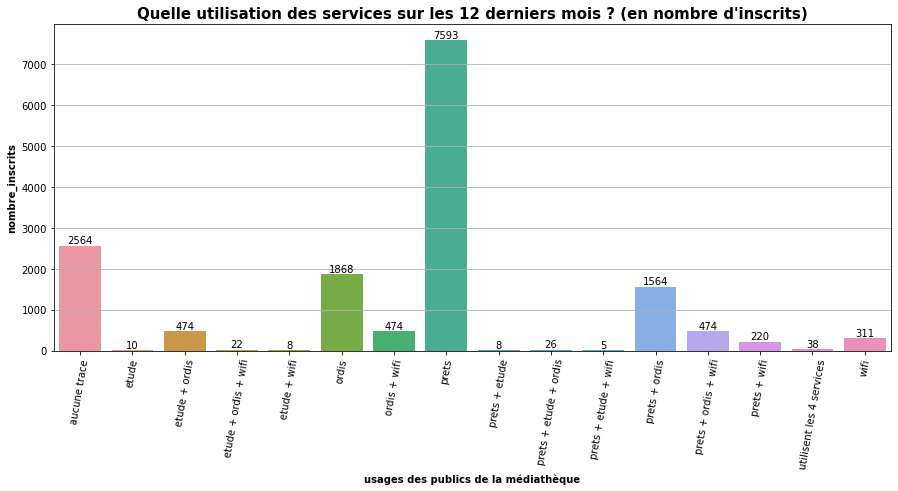

In [30]:
ax = sns.barplot(data=inscrits_usages,x=inscrits_usages.index,y="nombre_inscrits")
ax.tick_params(axis='x',rotation=80,bottom=True)
ax.set_title("Quelle utilisation des services sur les 12 derniers mois ? (en nombre d'inscrits)")

for i in ax.containers:
    ax.bar_label(i,)

**Note** : Ce graphique montre la répartition des usages des inscrits et non-inscrits. Il se lit de la manière suivant : "*Sur les 12 derniers mois, **x** *adherents ont emprunté (au moins une fois) des documents, tandis que* **y** *ont emprunté* **ET** *se sont connectés aux ordinateurs au moins une fois. En revanche* **z** *n'ont laissé aucune trace informatique.*

## Répartition (en %) des usages

In [31]:
inscrits_usages["En %"] = (inscrits_usages["nombre_inscrits"] / inscrits_usages["nombre_inscrits"].sum())*100
inscrits_usages["En %"] = inscrits_usages["En %"].round(1)
inscrits_usages = inscrits_usages.pivot_table(index='usages des publics de la médiathèque',
                                              values=["nombre_inscrits","En %"]
                                             )
inscrits_usages_pct = inscrits_usages[['En %']]

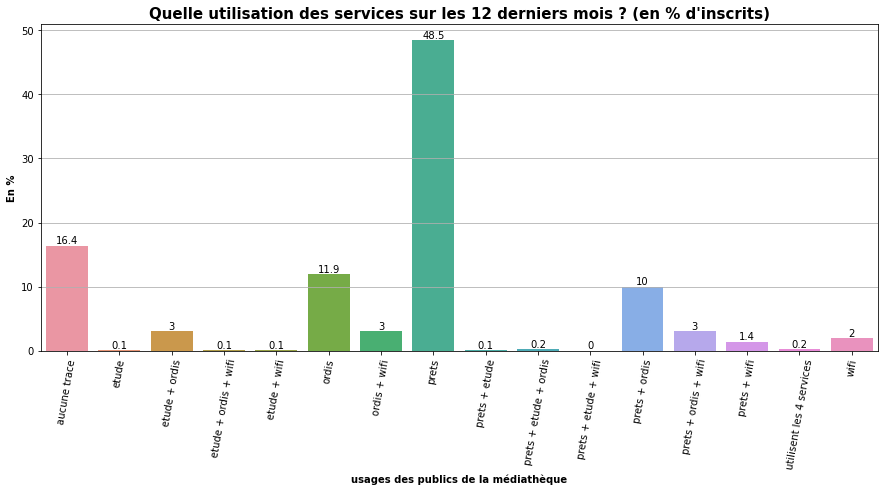

In [32]:
ax = sns.barplot(data=inscrits_usages_pct,x=inscrits_usages_pct.index,y="En %")
ax.tick_params(axis='x',rotation=80,bottom=True)
ax.set_title("Quelle utilisation des services sur les 12 derniers mois ? (en % d'inscrits)")

for i in ax.containers:
    ax.bar_label(i,)

# Fréquence des venues
Pour calculer la fréquence des venues, **on se base uniquement sur les usagers et usagères qui ont laissé une trace informatique**. Il peut s'agir : d'une connexion aux ordinateurs ou au wifi, d'un emprunt, d'un retour, d'une réservation ou d'une visite en salle d'étude.

In [33]:
inscrits_nb_venues = pd.DataFrame(inscrits,columns=["nb_venues"])

In [34]:
inscrits_nb_venues["jamais"] = np.where(inscrits_nb_venues["nb_venues"]==0,1,0)
inscrits_nb_venues["1 fois par an"] = np.where(inscrits_nb_venues["nb_venues"]==1,1,0)
inscrits_nb_venues["Entre 2 et 4 fois"] = np.where(inscrits_nb_venues["nb_venues"].between(2,4),1,0)
inscrits_nb_venues["Entre 5 et 9 fois"] = np.where(inscrits_nb_venues["nb_venues"].between(5,9),1,0)
inscrits_nb_venues["Entre 10 et 20 fois"] = np.where(inscrits_nb_venues["nb_venues"].between(10,20),1,0)
inscrits_nb_venues["Entre 21 et 50 fois"] = np.where(inscrits_nb_venues["nb_venues"].between(21,50),1,0)
inscrits_nb_venues["Plus de 50 fois"] = np.where(inscrits_nb_venues["nb_venues"]>50,1,0)

#inscrits_nb_venues

In [35]:
inscrits_nb_venues = inscrits_nb_venues.drop(labels=["nb_venues"],axis=1)

In [36]:
inscrits_nb_venues = inscrits_nb_venues.sum()

In [37]:
inscrits_nb_venues = inscrits_nb_venues.reset_index().rename(columns={"index":"fréquence de venues",0:"nombre_inscrits"})

In [38]:
#inscrits_nb_venues

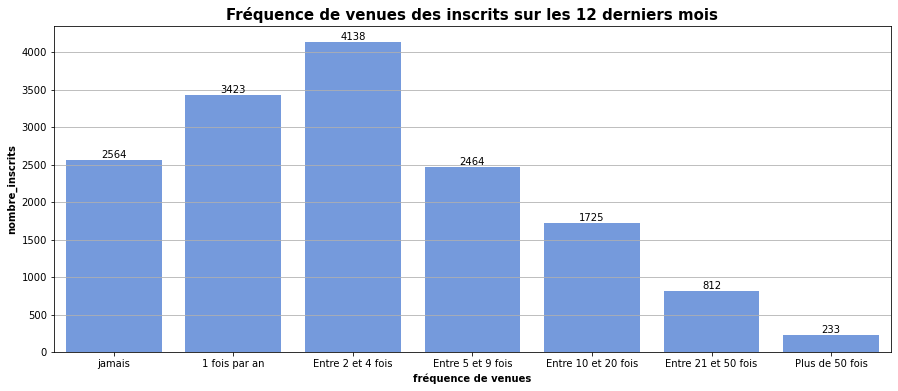

In [39]:
ax =sns.barplot(data=inscrits_nb_venues,
                x="fréquence de venues",y="nombre_inscrits",
                #palette='coolwarm',
                color='cornflowerblue'
               )
ax.set_title("Fréquence de venues des inscrits sur les 12 derniers mois")

for i in ax.containers:
    ax.bar_label(i,)

In [40]:
def pie_pourcentage(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

In [41]:
inscrits_nb_venues["En %"] = (inscrits_nb_venues["nombre_inscrits"] / inscrits_nb_venues["nombre_inscrits"].sum())*100
inscrits_nb_venues["En %"] = inscrits_nb_venues["En %"].round(1)

## Répartition des venues (en %) sur les 12 derniers mois

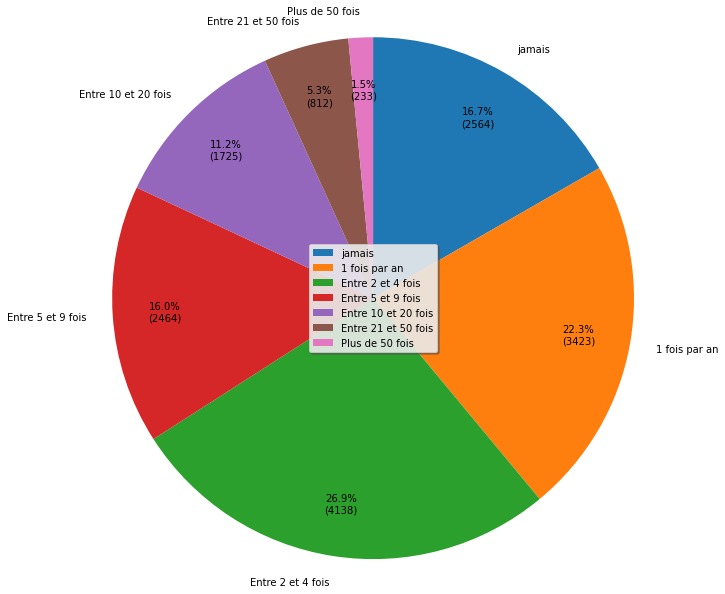

In [72]:
ax = plt.pie(inscrits_nb_venues["nombre_inscrits"],
             autopct=pie_pourcentage(inscrits_nb_venues["nombre_inscrits"]),
             radius=2,
             labels=inscrits_nb_venues["fréquence de venues"],
             counterclock=False,
             pctdistance=0.8,
             startangle=90
            )
ax = plt.legend(loc='center')

# Répartition des inscrits par type d'activité

In [43]:
inscrits_emprunt = pd.DataFrame(inscrits,columns=["nb_venues_prets_mediatheque","nb_venues_prets_bus"])
#inscrits_emprunt

In [44]:
inscrits_emprunt = inscrits_emprunt.fillna(0)

In [45]:
liste = ["nb_venues_prets_mediatheque","nb_venues_prets_bus"]

In [46]:
#inscrits_emprunt

In [47]:
inscrits_emprunt['nb_venues_prets'] = inscrits_emprunt[liste].sum(axis=1)
#inscrits_emprunt

In [48]:
inscrits_emprunt["ont emprunté au moins 1 fois"] = np.where(inscrits_emprunt["nb_venues_prets"]>=1,1,0)
inscrits_emprunt["n'ont jamais emprunté"] = np.where(inscrits_emprunt["nb_venues_prets"]==0,1,0)
#inscrits_emprunt

In [49]:
inscrits_emprunt = inscrits_emprunt.drop(columns=["nb_venues_prets","nb_venues_prets_mediatheque","nb_venues_prets_bus"])
#inscrits_emprunt

In [50]:
inscrits_emprunt = inscrits_emprunt.sum()

In [51]:
inscrits_emprunt = pd.DataFrame(inscrits_emprunt)
inscrits_emprunt = inscrits_emprunt.rename(columns={0:"nombre_inscrits"})
#inscrits_emprunt

In [52]:
inscrits_ordis = pd.DataFrame(inscrits,columns=["nb_venues_postes_informatiques"])
#inscrits_ordis

In [53]:
inscrits_ordis["se sont connectés au moins 1 fois aux ordinateurs"] = np.where(inscrits["nb_venues_postes_informatiques"]>=1,1,0)
inscrits_ordis["ne se sont jamais connectés aux ordinateurs"] = np.where(inscrits["nb_venues_postes_informatiques"]==0,1,0)
#inscrits_ordis

In [54]:
inscrits_ordis = inscrits_ordis.drop(labels=["nb_venues_postes_informatiques"],axis=1)
#inscrits_ordis

In [55]:
inscrits_ordis = inscrits_ordis.sum()
#inscrits_ordis

In [56]:
inscrits_ordis = pd.DataFrame(inscrits_ordis).rename(columns={0:"nombre_inscrits"})

In [57]:
#inscrits_ordis

In [58]:
inscrits_wifi = pd.DataFrame(inscrits,columns=["nb_venues_wifi"])
#inscrits_wifi

In [59]:
inscrits_wifi["se sont connectés au moins 1 fois au wifi"] = np.where(inscrits["nb_venues_wifi"]>=1,1,0)
inscrits_wifi["ne se sont jamais connectés au wifi"] = np.where(inscrits["nb_venues_wifi"]==0,1,0)

In [60]:
#inscrits_wifi

In [61]:
inscrits_wifi = inscrits_wifi.drop(labels=["nb_venues_wifi"],axis=1)
#inscrits_wifi

In [62]:
inscrits_wifi = inscrits_wifi.sum()
#inscrits_wifi

In [63]:
inscrits_wifi = pd.DataFrame(inscrits_wifi).rename(columns={0:"nombre_inscrits"})

In [64]:
inscrits_etude = pd.DataFrame(inscrits,columns=["nb_venues_salle_etude"])

In [65]:
inscrits_etude["sont venus au moins une fois en salle d'étude"] = np.where(inscrits_etude["nb_venues_salle_etude"]>=1,1,0)
inscrits_etude["ne sont jamais venus en salle d'étude"] = np.where(inscrits_etude["nb_venues_salle_etude"]<1,1,0)

In [66]:
#inscrits_etude

In [67]:
inscrits_etude = inscrits_etude.drop(["nb_venues_salle_etude"],axis=1)

In [68]:
inscrits_etude = inscrits_etude.sum()

In [69]:
inscrits_etude = pd.DataFrame(inscrits_etude).rename(columns={0:"nombre_inscrits"})

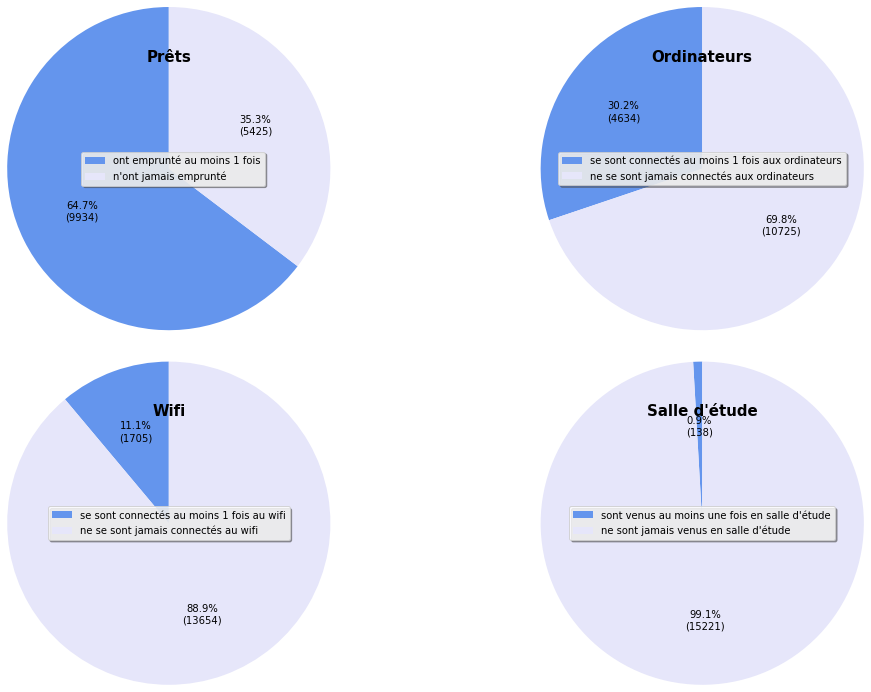

In [78]:
f,axs = plt.subplots(ncols=2,nrows=2,figsize=(15,10))
axs[0,0].pie(inscrits_emprunt["nombre_inscrits"],
             radius=2,
             autopct=pie_pourcentage(inscrits_emprunt["nombre_inscrits"]),
             #labels=inscrits_emprunt.index,
             colors=['cornflowerblue','lavender'],
             startangle=90,
            )
axs[0,0].legend(labels=inscrits_emprunt.index,loc="right")
axs[0,1].pie(inscrits_ordis["nombre_inscrits"],
             radius=2,
             colors=["cornflowerblue","lavender"],
             startangle=90,
             #labels=inscrits_ordis.index,
             autopct=pie_pourcentage(inscrits_ordis["nombre_inscrits"])
            )
axs[0,1].legend(labels=inscrits_ordis.index,loc="center")
axs[1,0].pie(inscrits_wifi["nombre_inscrits"],
             radius=2,
             colors=["cornflowerblue","lavender"],
             startangle=90,
             #labels=inscrits_wifi.index,
             autopct=pie_pourcentage(inscrits_wifi["nombre_inscrits"])
            )
axs[1,0].legend(labels=inscrits_wifi.index,loc="center")
axs[1,1].pie(inscrits_etude["nombre_inscrits"],
             radius=2,
             colors=["cornflowerblue","lavender"],
             startangle=90,
             #labels=inscrits_etude.index,
             autopct=pie_pourcentage(inscrits_etude["nombre_inscrits"])
            )
axs[1,1].legend(labels=inscrits_etude.index,loc="center")

#plt.suptitle("Nombre d'inscrits qui ont...",fontsize=16)
axs[0,0].set_title('Prêts',loc="center")
axs[0,1].set_title("Ordinateurs")
axs[1,0].set_title("Wifi")
axs[1,1].set_title("Salle d'étude")
plt.tight_layout()
plt.show()